In [13]:
import os
import re
import csv
import urllib
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import urlopen
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [14]:
if os.path.exists("stats.csv"):
    os.remove("stats.csv")
if os.path.exists("abilities.csv"):
    os.remove("abilities.csv")
api.dataset_download_file('dannielr/marvel-superheroes', 'charcters_stats.csv')
api.dataset_download_file('dannielr/marvel-superheroes', 'superheroes_power_matrix.csv')
os.rename("charcters_stats.csv", "stats.csv")
os.rename("superheroes_power_matrix.csv", "abilities.csv")

In [15]:
stats = pd.read_csv("stats.csv")
abilities = pd.read_csv("abilities.csv")
df = stats.merge(abilities, on=['Name'])
sdf = stats[stats.Name.isin(df.Name)]
adf = abilities[abilities.Name.isin(df.Name)]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
499,Silver Surfer,good,63,100,84,101,100,32,480


Special Abilities : 
['Agility', 'Dimensional Awareness', 'Durability', 'Energy Absorption', 'Flight', 'Marksmanship', 'Super Strength', 'Energy Blasts', 'Stamina', 'Super Speed', 'Teleportation', 'Immortality', 'Phasing', 'Invulnerability', 'Intangibility', 'Molecular Manipulation', 'Gravity Control', 'Energy Manipulation', 'Time Travel', 'Power Cosmic', 'Portal Creation']


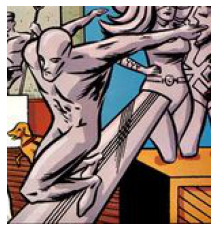

In [16]:
rand1 = sdf.sample()
display(rand1)
for i in rand1.Name :
    abdf = adf.loc[adf['Name'] == i]
    abidf = abdf.loc[:,[(abdf[col] == True).all() for col in abdf.columns]]
    print("Special Abilities : ")
    sa = list(abidf.columns)
    print(sa)
    # for j in sa:
    #     print(j, end = ",")
    temp = i.replace(" ", "_")
    marvellink = 'https://marvel.fandom.com/wiki/'+temp
    html = urlopen(marvellink)
    bs = BeautifulSoup(html, 'html.parser')
    il = bs.find('img', {'src':re.compile('.jpg')})['src']
    urllib.request.urlretrieve(il,"img.jpg")
    plt.imshow(mpimg.imread('img.jpg'))
    plt.axis('off')
    plt.show()
    os.remove("img.jpg")